In [1]:

import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import spacy

In [2]:
pip install spacy

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!python -m spacy download el_core_news_sm

2023-07-05 21:17:56.796322: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 42.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [5]:
mega_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mega.csv')

In [6]:
mega_df.head()

Κανάλι      Δημοσιογράφος                                          full_text
0   mega  Νίκος Ευαγγελάτος  Μια σκυταλοδρομία είναι. Μια σκυταλοδρομία από...

In [7]:
text = mega_df['full_text'].str.cat(sep = ' ')

In [8]:
text

"Μια σκυταλοδρομία είναι. Μια σκυταλοδρομία από χθες το βράδυ. Όλο αυτό που βλέπετε. Μια σκυταλοδρομία τραγωδίας. Καλησπέρα σας φίλες και φίλοι. Καλό μήνα να έχουμε. Αν κι ο μήνας ξεκίνησε με το χειρότερο δυνατό τρόπο. Αντιμετωπίζουμε μια εθνική τραγωδία. Ξέρουμε μέχρι τώρα επιβεβαιωμένα 36 νεκρούς. Στην ενημέρωση που έγινε επισήμως πριν από λίγη ώρα, για μια ακόμα φορά επισημάνθηκε ότι οι νεκροί θα είναι περισσότεροι. Δεν υπάρχει εκτίμηση για το πόσοι, γιατί δεν ξέρουμε ακόμα πόσοι είναι οι αγνοούμενοι. Είναι πολύ τραυματίες και είναι και πραγματικά. Πώς να το πω, μια ακόμα λεπτομέρεια που κάνει την τραγωδία μεγαλύτερη και τόσο που να μας πονάει περισσότερο, ότι οι περισσότεροι, και νεκροί και τραυματίες, είναι νέα παιδιά. Είναι φοιτητές που χθες το βράδυ είχαν φύγει με το τρένο από την Αθήνα να πάνε στη Βόρεια Ελλάδα στα πανεπιστήμια τους μετά το τετραήμερο της Καθαράς Δευτέρας που είχαν περάσει με τις οικογένειές τους. Μιλάμε για μια απίστευτη τραγωδία. Επειδή θα προσπαθήσουμε να δε

In [9]:
nlp = spacy.load('el_core_news_sm')

In [10]:
list(nlp.Defaults.stop_words)[0:20]

['κάποιες',
 'οποιαδήποτε',
 'ίδιοι',
 'ταύτες',
 'εύγε',
 'μήτε',
 'περίπου',
 'ποιάν',
 'ήσασταν',
 'πόσην',
 'άλλον',
 'όση',
 'ότου',
 'μολονότι',
 'μόνους',
 'ετούτα',
 'έτερη',
 'εγώ',
 'ίσως',
 'είσαι']

In [11]:
import matplotlib.pyplot as plt

In [20]:
nlp.Defaults.stop_words |= {"λένε","λέγω","μιλάμε","υπάρχει","υπάρχω","γίνομαι", "πολύς"}

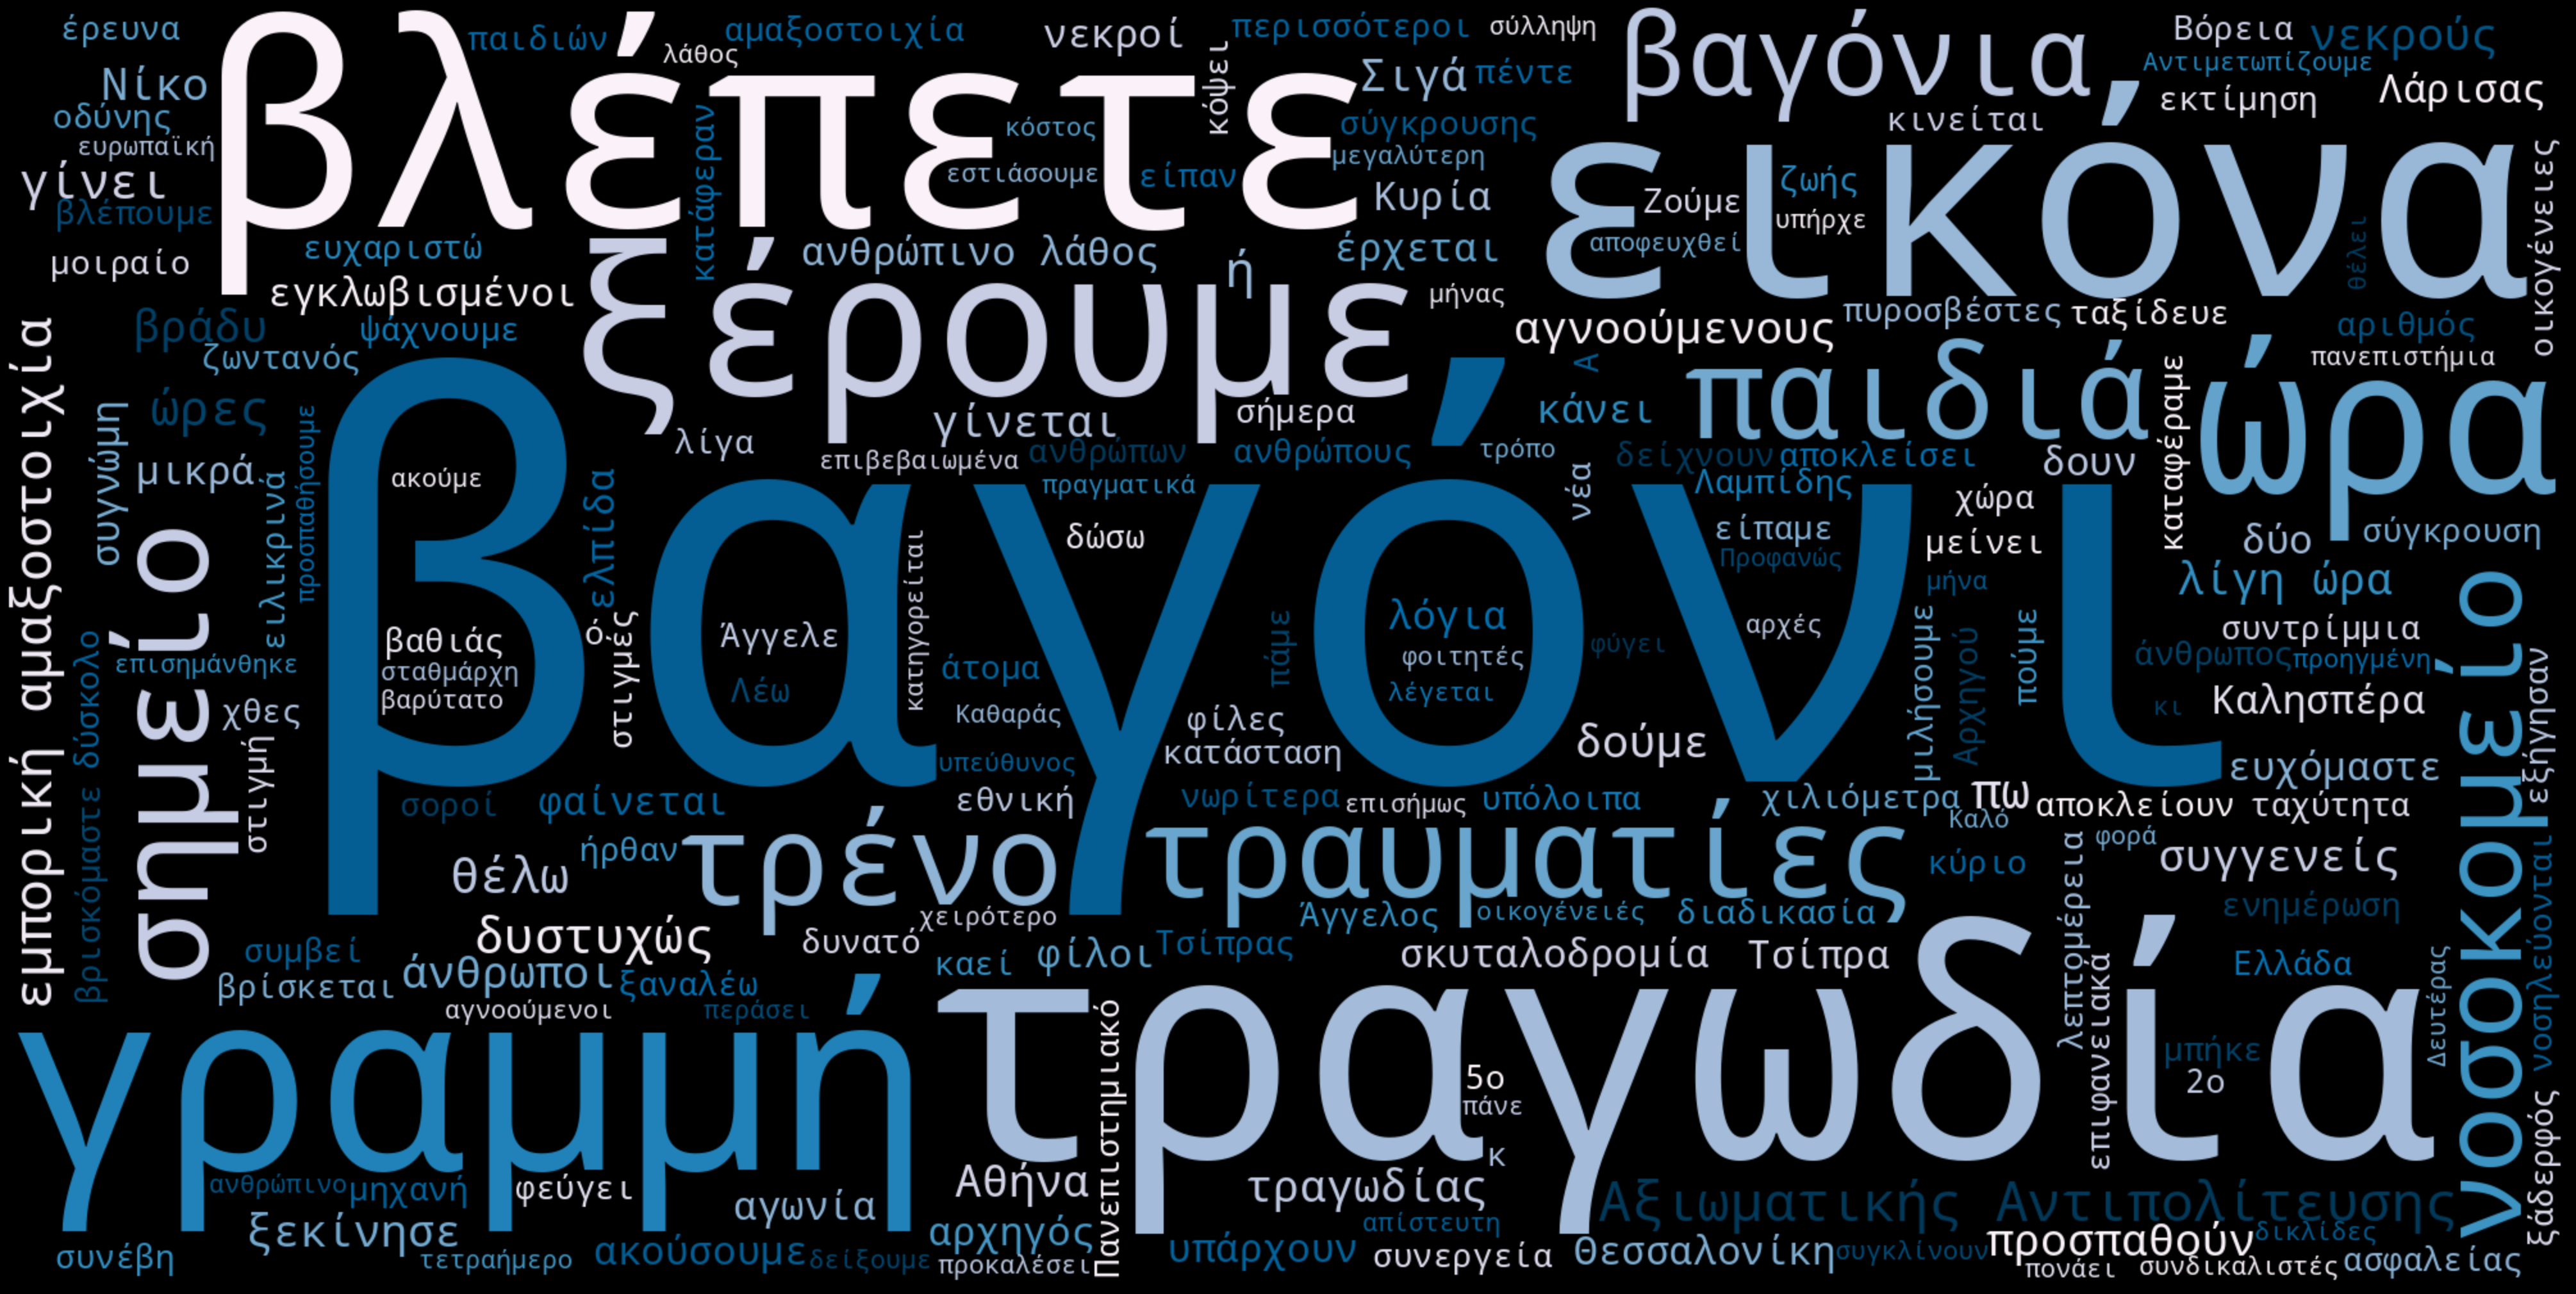

In [21]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap='PuBu'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [13]:
doc = nlp(text)

In [ ]:
for token in doc:
    print(token, token.lemma_)

In [15]:
' '.join(token.lemma_ for token in doc)

"ένας σκυταλοδρομία είμαι . ένας σκυταλοδρομία από χθες ο βράδυ . όλο αυτός που βλέπω . ένας σκυταλοδρομία τραγωδία . Καλησπέρα μου φίλος και φίλος . Καλό μήνας να έχω . αν και ο μήνας ξεκινώ με ο χειρότερο δυνατός τρόπος . Αντιμετωπίζουμε ένας εθνικός τραγωδία . Ξέρουμε μέχρι τώρα επιβεβαιωμένα 36 νεκρός . σε ο ενημέρωση που γίνομαι επισήμως πριν από λίγη ώρα , για ένας ακόμα φορά επισημάννω ότι ο νεκρός θα είμαι πολύς . δεν υπάρχω εκτίμηση για ο πόσοι , γιατί δεν ξέρω ακόμα πόσοι είμαι ο αγνοούμενος . είμαι πολύ τραυματίας και είμαι και πραγματικά . Πώς να εγώ λέγω , ένας ακόμα λεπτομέρεια που κάνω ο τραγωδία μεγάλος και τόσο που να εγώ πονώ πολύ , ότι ο πολύς , και νεκρός και τραυματίας , είμαι νέος παιδί . είμαι φοιτητής που χθες ο βράδυ έχω φύγει με ο τρένο από ο Αθήνα να πάνε σε ο βόρειος Ελλάδα σε ο πανεπιστήμιο μου μετά ο τετραήμερο ο Καθαρά Δευτέρας που έχω περνώ με ο οικογένεια μου . Μιλάμε για ένας απίστευτη τραγωδία . επειδή θα προσπαθώ να δείξουμε τι συνέβη , αλλά θα εστιά

In [16]:
full_doc = nlp(text)

In [17]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

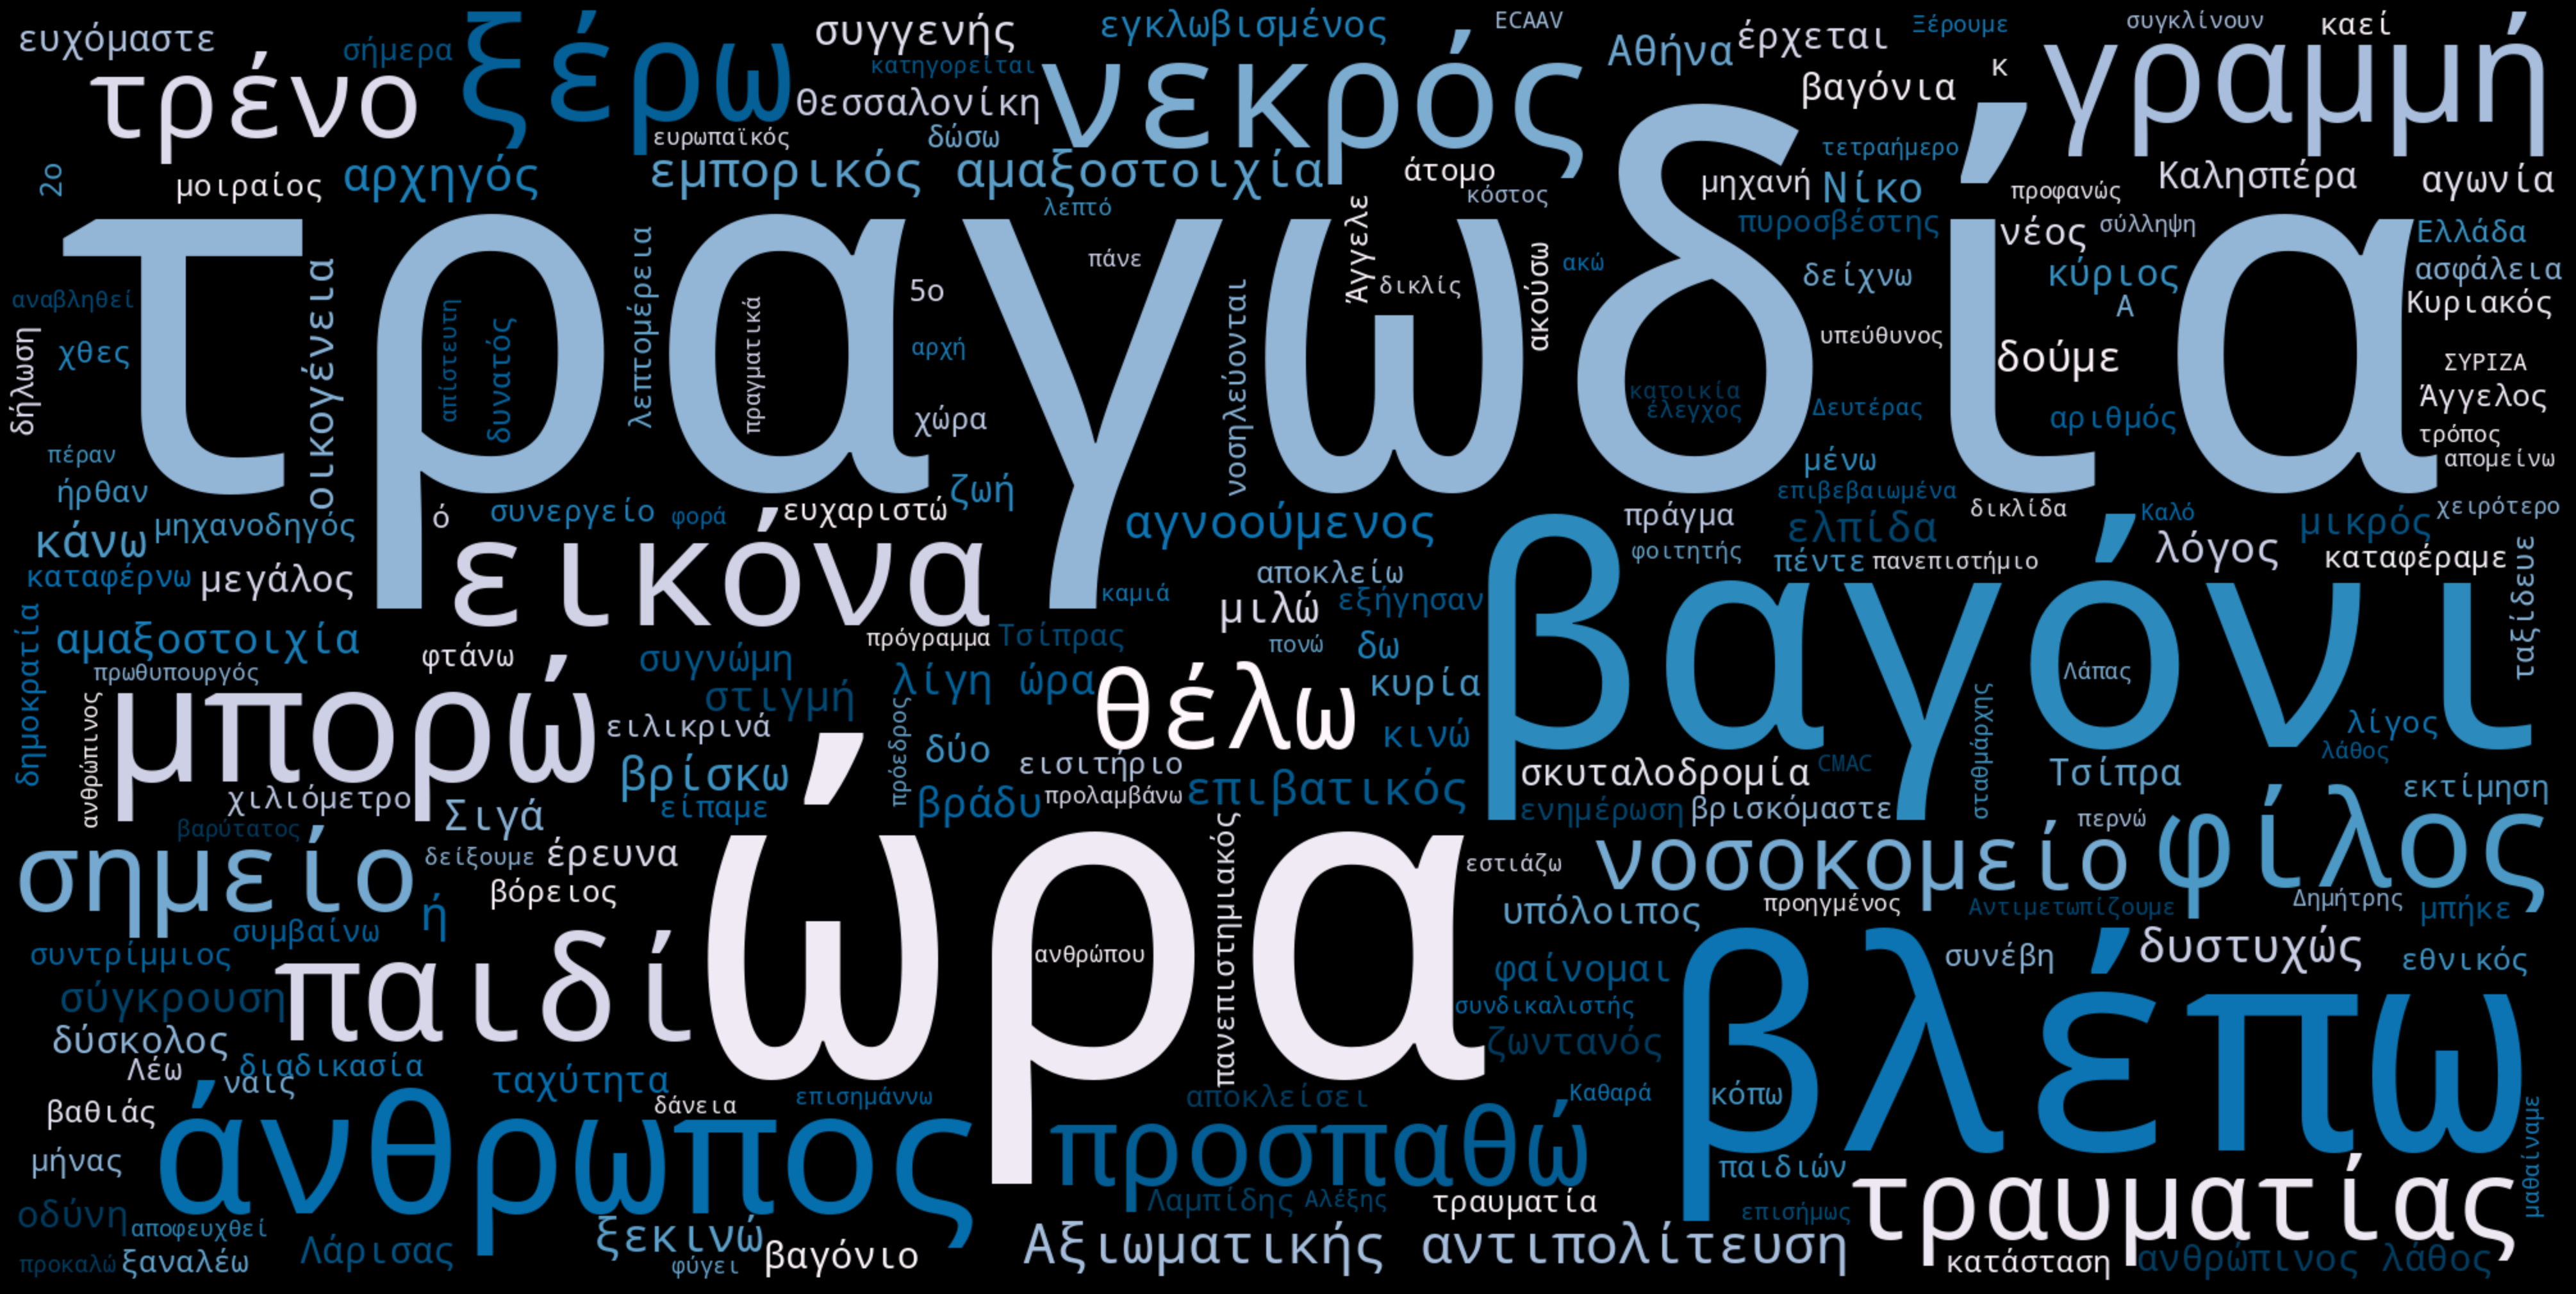

In [22]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap='PuBu'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [24]:
count_vector = cv.fit_transform(mega_df['full_text'])

In [25]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words)

In [26]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(mega_df['full_text'])
results1 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results1.head()

άγγελος λαμπίδης  αγνοούμενους ξέρουμε  ανθρώπινο λάθος  \
0                 2                     2                3   

   αξιωματικής αντιπολίτευσης  αρχηγού αξιωματικής  αρχηγός αξιωματικής  \
0                           6                    2                    3   

   βαθιάς οδύνης  βόρεια ελλάδα  εμπορική αμαξοστοιχία  ευχόμαστε ευχόμαστε  \
0              2              2                      6                    2   

   θέλω ειλικρινά  λίγη ώρα  νέα παιδιά  νοσοκομείο λάρισας  σημείο τραγωδίας  \
0               2         4           2                   2                 3   

   σιγά προσπαθούν  σιγά σιγά  στιγμές βαθιάς  υπάρχουν εγκλωβισμένοι  \
0                2          2               2                       2   

   φίλες φίλοι  
0            2

In [27]:
results1.sum(axis =0).sort_values(ascending = False)

αξιωματικής αντιπολίτευσης    6
εμπορική αμαξοστοιχία         6
λίγη ώρα                      4
ανθρώπινο λάθος               3
αρχηγός αξιωματικής           3
σημείο τραγωδίας              3
άγγελος λαμπίδης              2
νοσοκομείο λάρισας            2
υπάρχουν εγκλωβισμένοι        2
στιγμές βαθιάς                2
σιγά σιγά                     2
σιγά προσπαθούν               2
θέλω ειλικρινά                2
νέα παιδιά                    2
αγνοούμενους ξέρουμε          2
ευχόμαστε ευχόμαστε           2
βόρεια ελλάδα                 2
βαθιάς οδύνης                 2
αρχηγού αξιωματικής           2
φίλες φίλοι                   2
dtype: int64

In [28]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(mega_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

αμαξοστοιχία  αντιπολίτευσης  αξιωματικής  βαγόνι  βαγόνια  βλέπετε  γίνει  \
0             8               6            6      11        6        7      5   

   γραμμή  δυστυχώς  εικόνα  εμπορική  νοσοκομείο  ξέρουμε  παιδιά  πω  \
0       7         5       7         6           6        6       6   5   

   σημείο  τρένο  τραγωδία  τραυματίες  ώρα  
0       6      6         9           6   10

In [29]:
results.sum(axis =0).sort_values(ascending = False)

βαγόνι            11
ώρα               10
τραγωδία           9
αμαξοστοιχία       8
βλέπετε            7
γραμμή             7
εικόνα             7
βαγόνια            6
αντιπολίτευσης     6
νοσοκομείο         6
ξέρουμε            6
παιδιά             6
σημείο             6
τρένο              6
αξιωματικής        6
τραυματίες         6
εμπορική           6
γίνει              5
δυστυχώς           5
πω                 5
dtype: int64

In [30]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [32]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [33]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [34]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [35]:
matrix = vec.fit_transform(mega_df['full_text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γινομαι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    1     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  

[1 rows x 13161 columns]

In [36]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [37]:
mega_df['anger'] = wordcount_df[angry_words].sum(axis=1)

mega_df['positive'] = wordcount_df[positive_words].sum(axis=1)

mega_df['joy'] = wordcount_df[joy_words].sum(axis=1)

mega_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

mega_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

mega_df['trust'] = wordcount_df[trust_words].sum(axis=1)

mega_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

mega_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

mega_df['negative'] = wordcount_df[negative_words].sum(axis=1)

mega_df['fear'] = wordcount_df[fear_words].sum(axis=1)

mega_df['anger_per'] = wordcount_df[angry_words].sum(axis=1)

In [38]:
mega_df.head()

Κανάλι      Δημοσιογράφος  \
0   mega  Νίκος Ευαγγελάτος   

                                           full_text  anger  positive  joy  \
0  Μια σκυταλοδρομία είναι. Μια σκυταλοδρομία από...     40        70   27   

   disgust  surprise  trust  anticipation  sadness  negative  fear  anger_per  
0       26        29     37            38       40        80    55         40

In [39]:
mega_df['total_words'] = mega_df['full_text'].str.split().apply(len)

mega_df['anger_per'] = (mega_df['anger'] / mega_df['total_words']) * 100
mega_df['positive_per'] = (mega_df['positive'] / mega_df['total_words']) * 100
mega_df['joy_per'] = (mega_df['joy'] / mega_df['total_words']) * 100
mega_df['disgust_per'] = (mega_df['disgust'] / mega_df['total_words']) * 100
mega_df['surprise_per'] = (mega_df['surprise'] / mega_df['total_words']) * 100
mega_df['trust_per'] = (mega_df['trust'] / mega_df['total_words']) * 100
mega_df['anticipation_per'] = (mega_df['anticipation'] / mega_df['total_words']) * 100
mega_df['sadness_per'] = (mega_df['sadness'] / mega_df['total_words']) * 100
mega_df['negative_per'] = (mega_df['negative'] / mega_df['total_words']) * 100
mega_df['fear_per'] = (mega_df['fear'] / mega_df['total_words']) * 100

mega_df = mega_df.drop('total_words', axis=1)
mega_df.head()

Κανάλι      Δημοσιογράφος  \
0   mega  Νίκος Ευαγγελάτος   

                                           full_text  anger  positive  joy  \
0  Μια σκυταλοδρομία είναι. Μια σκυταλοδρομία από...     40        70   27   

   disgust  surprise  trust  anticipation  ...  anger_per  positive_per  \
0       26        29     37            38  ...   1.906578      3.336511   

   joy_per  disgust_per  surprise_per  trust_per  anticipation_per  \
0  1.28694     1.239276      1.382269   1.763584          1.811249   

   sadness_per  negative_per  fear_per  
0     1.906578      3.813155  2.621544  

[1 rows x 23 columns]